In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('marketing_customer_analysis_clean.csv')  
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [3]:
df.select_dtypes(include=np.number)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


# X-y SPLIT

In [4]:
X = df[['customer_lifetime_value', "income", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception", "number_of_open_complaints", "number_of_policies"]]
y = df[['total_claim_amount']]

# Train-test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [7]:
#WE DO EVERYTHING ON THE TRAINING SET. THE TEST SET IS JUST TO SEE HOW ACCURATE THE MODEL IS. WE DON'T TOUCH THE TEST SET TO CREATE THE MODEL.

# SCALING

In [8]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
8752,5932.560456,48278,74,15.149071,7,0.384256,4
2531,5295.625697,0,74,19.000000,71,0.000000,3
8626,2397.036098,22283,65,16.000000,93,0.000000,1
9496,27420.813180,0,112,23.000000,20,0.000000,2
3985,14727.505260,97785,73,35.000000,36,0.000000,2
...,...,...,...,...,...,...,...
350,2476.480866,47918,62,2.000000,51,0.000000,1
79,9312.585034,75986,115,11.000000,44,0.000000,3
8039,4874.665223,67467,61,4.000000,22,0.000000,9
6936,21159.301510,0,108,15.000000,17,0.000000,2


In [9]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1250,2810.464447,26790,71,4.0,41,0.0,1
5438,2605.599527,20592,71,15.0,81,1.0,1
10156,7451.492020,0,107,6.0,63,0.0,8
3441,16477.768430,49825,70,14.0,27,3.0,2
682,9192.592887,37388,117,30.0,21,0.0,5
...,...,...,...,...,...,...,...
5063,16727.771860,30915,72,1.0,6,2.0,2
10053,5067.208338,29095,127,2.0,80,0.0,1
3453,6725.043747,0,95,15.0,8,0.0,5
9241,3940.123576,92539,100,1.0,55,0.0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
#We have to scale BOTH X train and test. We have to use the same scaler on both.

In [13]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.056563,0.482872,0.054852,0.432831,0.070707,0.076851,0.375
1,0.047634,0.000000,0.054852,0.542857,0.717172,0.000000,0.250
2,0.006996,0.222872,0.016878,0.457143,0.939394,0.000000,0.000
3,0.357823,0.000000,0.215190,0.657143,0.202020,0.000000,0.125
4,0.179866,0.978036,0.050633,1.000000,0.363636,0.000000,0.125
...,...,...,...,...,...,...,...
8177,0.008110,0.479271,0.004219,0.057143,0.515152,0.000000,0.000
8178,0.103951,0.760004,0.227848,0.314286,0.444444,0.000000,0.250
8179,0.041732,0.674798,0.000000,0.114286,0.222222,0.000000,1.000
8180,0.270039,0.000000,0.198312,0.428571,0.171717,0.000000,0.125


In [14]:
X_test_scaled=scaler.fit_transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.009847,0.268327,0.042373,0.114286,0.414141,0.0,0.000
1,0.007327,0.206248,0.042373,0.428571,0.818182,0.2,0.000
2,0.066921,0.000000,0.194915,0.171429,0.636364,0.0,0.875
3,0.177924,0.499043,0.038136,0.400000,0.272727,0.6,0.125
4,0.088333,0.374475,0.237288,0.857143,0.212121,0.0,0.500
...,...,...,...,...,...,...,...
2723,0.180998,0.309642,0.046610,0.028571,0.060606,0.4,0.125
2724,0.037600,0.291413,0.279661,0.057143,0.808081,0.0,0.000
2725,0.057987,0.000000,0.144068,0.428571,0.080808,0.0,0.500
2726,0.023739,0.926864,0.165254,0.028571,0.555556,0.0,0.000


# Creating our model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
#We just use scaled for X (train AND test so they both have the same scale), not Y.

In [18]:
model = lm.fit(X_train_scaled, y_train)

In [19]:
model.coef_

array([[ -42.27972663, -335.35569563, 1247.73415775,   -4.79849607,
         -17.61939479,  -13.73769717,    1.39763658]])

In [20]:
model.intercept_

array([405.49865577])

In [21]:
#Now we have the equation for standarized values.

In [22]:
#NOW WE CAN PREDICT WITH AN EXAMPLE:

#I choose the first row: [0.01279242, 0.26795091, 0.04219409, ..., 0.41414141, 0., 0.]

In [23]:
X_test_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.009847,0.268327,0.042373,0.114286,0.414141,0.0,0.000
1,0.007327,0.206248,0.042373,0.428571,0.818182,0.2,0.000
2,0.066921,0.000000,0.194915,0.171429,0.636364,0.0,0.875
3,0.177924,0.499043,0.038136,0.400000,0.272727,0.6,0.125
4,0.088333,0.374475,0.237288,0.857143,0.212121,0.0,0.500
...,...,...,...,...,...,...,...
2723,0.180998,0.309642,0.046610,0.028571,0.060606,0.4,0.125
2724,0.037600,0.291413,0.279661,0.057143,0.808081,0.0,0.000
2725,0.057987,0.000000,0.144068,0.428571,0.080808,0.0,0.500
2726,0.023739,0.926864,0.165254,0.028571,0.555556,0.0,0.000


In [24]:
random_value = np.array([0.009847, 0.268327, 0.042373, 0.114286, 0.414141, 0.0,0.000]).reshape(1,-1)

In [25]:
random_value.shape

(1, 7)

In [26]:
model.predict(random_value)

C:\Users\41791\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[360.12226433]])

# Create "real vs predicted" DataFrame¶

In [27]:
y_pred = model.predict(X_test_scaled)

In [28]:
pd.DataFrame(y_pred)[0]

0       360.122243
1       369.672624
2       635.059667
3       263.409487
4       565.102400
           ...    
2723    345.637556
2724    640.612338
2725    580.023811
2726    289.933656
2727    378.940135
Name: 0, Length: 2728, dtype: float64

In [29]:
y_pred.shape

(2728, 1)

In [30]:
np.array(y_test)

array([[340.8     ],
       [195.153339],
       [770.4     ],
       ...,
       [684.      ],
       [ 25.713622],
       [497.684017]])

In [31]:
real_vs_pred = pd.DataFrame({'y_test': y_test['total_claim_amount'], 'y_pred':y_pred[:,0]})

In [32]:
real_vs_pred

,y_test,y_pred
1250,340.800000,360.122243
5438,195.153339,369.672624
10156,770.400000,635.059667
3441,336.000000,263.409487
682,561.600000,565.102400
...,...,...
5063,345.600000,345.637556
10053,664.280864,640.612338
3453,684.000000,580.023811
9241,25.713622,289.933656


# COMPUTE MSE

In [33]:
from sklearn.metrics import mean_squared_error as mse

In [34]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])

42408.76319713724

# COMPUTE RMSE

In [35]:
import math

In [36]:
round(math.sqrt(42408.76319713724),2)

205.93

In [37]:
#THIS MEANS ON AVERAGE OUR MODEL IS OFF BY 205,9 BETWEEN Y_TEST AND Y_PRED

# COMPUTE MAE

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [39]:
#We need y_test and y_pred separated.

In [40]:
y_test_new = real_vs_pred[["y_test"]]
y_test_new

,y_test
1250,340.800000
5438,195.153339
10156,770.400000
3441,336.000000
682,561.600000
...,...
5063,345.600000
10053,664.280864
3453,684.000000
9241,25.713622


In [41]:
y_pred_new = real_vs_pred[["y_pred"]]
y_pred_new

,y_pred
1250,360.122243
5438,369.672624
10156,635.059667
3441,263.409487
682,565.102400
...,...
5063,345.637556
10053,640.612338
3453,580.023811
9241,289.933656


In [42]:
mean_absolute_error(y_test_new, y_pred_new)

145.35305936070844

In [43]:
r2_score(y_test_new, y_pred_new)

0.5337283044094174

# COMPUTE R2

In [44]:
#EXPLANATORY POWER OF A MODEL. HOW MUCH % OF Y CAN BE EXPLAINED BY THE INDEPENDANT VARIABLES WE HAVE CHOSEN.

In [45]:
#R2= [0,1]. The better the model the closer to 1 (100%). The worse the model the closer to 0 (0%).

In [46]:
import statsmodels.api as sm

In [47]:
r2_score(y_test_new, y_pred_new)

0.5337283044094174

In [48]:
X_train_const = sm.add_constant(X_train.to_numpy())

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1242.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:52:04   Log-Likelihood:                -55007.
No. Observations:                8182   AIC:                         1.100e+05
Df Residuals:                    8174   BIC:                         1.101e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3022      9.203      9.269      0.000      67.262     103.343
x1            -0.0006      0.000     -1.634      0.102      -0.001       0.000
x2            -0.0034   7.34e-05    -45.680      0.000      -0.003      -0.003
x3             5.2647      0.071     74.116      0.000       5.125       5.404
x4            -0.1371      0.228     -0.601      0.548      -0.584       0.310
x5            -0.1780      0.080     -2.233      0.026      -0.334      -0.022
x6            -2.7475      2.532     -1.085      0.278      -7.710       2.215
x7             0.1747      0.927      0.189      0.850      -1.642       1.991
==============================================================================
Omnibus:                      724.972   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3998.024
Skew:                           0.235   Prob(JB):                         0.00
Kurtosis:                       6.392   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Taking a look at some plots

In [49]:
import matplotlib.pyplot as plt

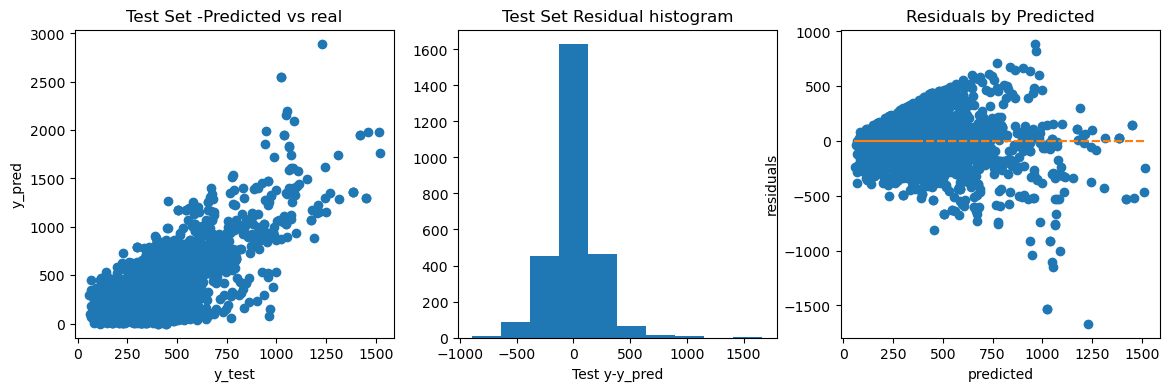

In [50]:
## Plot y_pred vs y_test. THEY SHOULD BE SIMILAR and LINEAR.
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['total_claim_amount'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")



# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['total_claim_amount'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['total_claim_amount']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# Plotting the feature importances

In [51]:
coefficients = model.coef_.reshape(-1,1)

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [ ]:
coefficients

In [ ]:
coefficients = coefficients.reshape(7,)

In [ ]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient': coefficients})

In [ ]:
feature_importances

In [ ]:
sns.set(rc={"figure.figsize":(20, 8)})

In [ ]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])